In [1]:
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy 
import numpy as np
import pandas as pd
import xarray as xr
import scipy
from scipy import special
from scipy.stats import norm
from scipy.stats import ks_2samp as ks_2samp
import xesmf as xe 
import seaborn as sns 

In [233]:
W_hw   = 4
W_hfls = 0
W_dsl  = 0

DIR_HW   = '/scratch/lorenzosangelantoni/gcm_driven_experiment_from_nird/scripts/python_2/hws/OUTPUTS'
DIR_HFLS = '/scratch/lorenzosangelantoni/gcm_driven_experiment_from_nird/scripts/python_2/hfls/outputs'
DIR_DSL  = '/scratch/lorenzosangelantoni/gcm_driven_experiment_from_nird/scripts/python_2/dsl/OUTPUTS'
boundaries = np.array([1,16.9,40,50]) ; min_lon,max_lon,min_lat,max_lat = boundaries

doms    = [[-2,6.5,43,48.5], [7.5,13,43.8,45.8], [6.0,14.8,45.8,48.6], [6,22,48,50]]
doms    = [[7.5,13,43.8,45.8], [6,22,48,50], [-2,6.5,43,48.5], [6.0,14.8,45.8,48.6]]
doms    = [[7.5,13,43.8,45.8], [6,22,48,50], [-2,6.5,43,48.5], [6.0,14.8,45.8,48.0]]


domains = ['dom_w','dom_po','dom_alps','dom_e']
domains_name = ['GAR-W','GAR-PO','GAR-ALPS','GAR-N']

domains = ['dom_po','dom_n','dom_w','dom_alps']
domains_name = ['PO VALLEY','NORTH-GAR','WEST-GAR','ALPS']

metrics_hw = ['HW days mean tmax CCS','HW days max tmax CCS','HWs persistence CCS','HWMId','HWs freq. CCS']
metrics_hfls = ['HW days evap. deficit CCS','HW days HFLS CCS']
metrics_dsl = ['Mean DSL CCS']

metrics_hw_st = ['HW_mean_tmax_ccs','HW_max_tmax_ccs','HW_persistence_ccs','HWMId_ccs','HW_freq_CCS']
metrics_hfls_st = ['evap_deficit_ccs','mean_HFLS_ccs']
metrics_dsl_st = ['mean_DSL_ccs']

## RCMs HW metrics CCS

In [234]:
models_ranked_to_plot = [ 'BCCR-AUTH','FZJ-IDL','BTU','CMCC','KIT','ETHZ','HCLIM','KNMI','CNRM','ICTP','UKMO']
models = [ 'BCCR-AUTH','BTU','CMCC','CNRM','ETHZ','FZJ-IDL','HCLIM','ICTP','KIT','KNMI','UKMO']

dir_home_his     = f'{DIR_HW}/historical/nonCP'
dir_home_rcp85   = f'{DIR_HW}/rcp85/nonCP'

execute_array_his = ['ds_his.HW_mean_tmax','ds_his.HW_max_tmax','ds_his.HW_persistence',
                         'ds_his.HW_HWMI','ds_his.HW_number']
execute_array_rcp85 = ['ds_rcp85.HW_mean_tmax','ds_rcp85.HW_max_tmax','ds_rcp85.HW_persistence',
                           'ds_rcp85.HW_HWMI','ds_rcp85.HW_number']

ccs_rcm_hw_all=[]

for d in range(0,len(domains)) : # loop across domains 
    
    ds_his = []
    ds_his = xr.open_mfdataset(f'{dir_home_his}/*.nc',combine='nested',concat_dim='model')
    ds_his.load()
    ds_his = ds_his.sel(model=models_ranked_to_plot)
    ds_his['lat'] = ds_his.lat.mean(dim='model') ; ds_his['lon'] = ds_his.lon.mean(dim='model')
    
    ds_rcp85 = [] 
    ds_rcp85 = xr.open_mfdataset(f'{dir_home_rcp85}/*.nc',combine='nested',concat_dim='model')
    ds_rcp85.load()
    ds_rcp85 = ds_rcp85.sel(model=models_ranked_to_plot)
    ds_rcp85['lat'] = ds_rcp85.lat.mean(dim='model') ; ds_rcp85['lon'] = ds_rcp85.lon.mean(dim='model')
    
    """
    # Filter out the excluded models
    models_to_exclude = ['UKMO']
    ds_his = ds_his.where(~ds_his.model.isin(models_to_exclude), drop=True)
    ds_rcp85 = ds_rcp85.where(~ds_rcp85.model.isin(models_to_exclude), drop=True)
    """
    
    mask = np.logical_and(np.logical_and(doms[d][0] <= ds_his.lon,ds_his.lon <= doms[d][1]),
                      np.logical_and(doms[d][2] <= ds_his.lat,ds_his.lat <= doms[d][3]))
    
    ds_his = ds_his.where(mask, drop=True)
    ds_rcp85 = ds_rcp85.where(mask, drop=True)

    
    ccs_rcm_hw = eval(execute_array_rcp85[W_hw]).mean(dim='time').quantile(.5, dim='model') - eval(execute_array_his[W_hw]).mean(dim='time').quantile(.5, dim='model').assign_coords(ENS='RCMs')
    #ccs_rcm_hw = eval(execute_array_rcp85[W_hw]).mean(dim='time').mean(dim='model') - eval(execute_array_his[W_hw]).mean(dim='time').mean(dim='model').assign_coords(ENS='RCMs')
    ccs_rcm_hw_all.append(ccs_rcm_hw.mean().values)
 




/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.a

/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


ccs with median: <xarray.DataArray 'HW_number' ()>
array(3.5099444, dtype=float32)
Coordinates:
    quantile  float64 0.5
    ENS       <U4 'RCMs'
ccs with mean: <xarray.DataArray 'HW_number' ()>
array(3.373842, dtype=float32)
Coordinates:
    ENS      <U4 'RCMs'


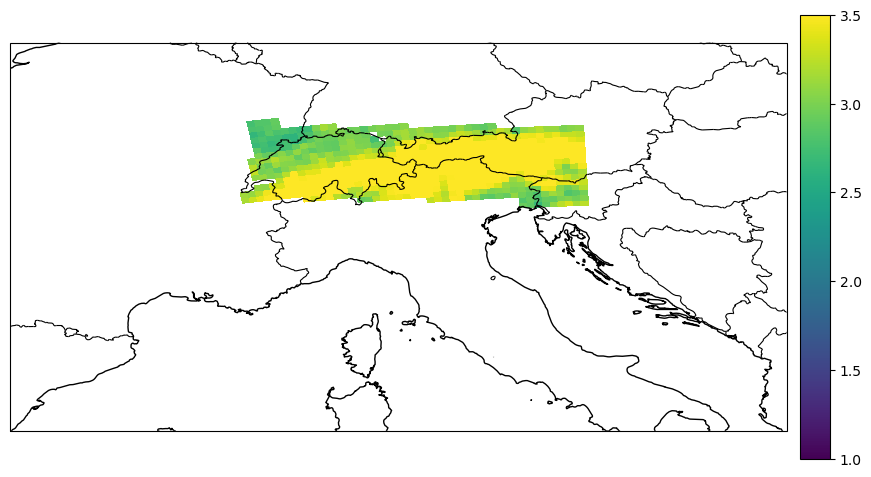

In [235]:
ccs = eval(execute_array_rcp85[W_hw]).mean(dim='time').quantile(.5, dim='model') - eval(execute_array_his[W_hw]).mean(dim='time').quantile(.5, dim='model').assign_coords(ENS='RCMs')
print(f'ccs with median: {np.mean(ccs)}')
ccs = eval(execute_array_rcp85[W_hw]).mean(dim='time').mean(dim='model') - eval(execute_array_his[W_hw]).mean(dim='time').mean(dim='model').assign_coords(ENS='RCMs')
print(f'ccs with mean: {np.mean(ccs)}')

# Plotting the historical data
fig, axes = plt.subplots(ncols=1,nrows=1, figsize=(12,7.2),
                             subplot_kw={'projection': ccrs.PlateCarree()})
    

P1 = axes.pcolor(ds_his.lon, ds_his.lat,ccs,
                 vmin=1,vmax=3.5,transform=ccrs.PlateCarree())    

axes.coastlines(linewidth = 1)
axes.set_extent([0,20,40,50], crs=ccrs.PlateCarree())
axes.add_feature(cartopy.feature.BORDERS,linewidth=.8)

cb = fig.colorbar(P1, ax=(axes), orientation='vertical',aspect=15,shrink=.8,pad=.015)
plt.show()

## RCMs HFLS CCS

In [236]:
ccs_rcm_hfls_all=[]
   
dir_home_his     = f'{DIR_HW}/historical/nonCP'
dir_home_rcp85   = f'{DIR_HW}/rcp85/nonCP'

execute_array_his   =  (["ds_his.HW_hfls_deficit", "ds_his.HW_mean_hfls"])
execute_array_rcp85 =  (["ds_rcp85.HW_hfls_deficit", "ds_rcp85.HW_mean_hfls"])
 
for d in range(0,len(domains)) : # loop across domains 
    
    ds_his = []
    ds_his = xr.open_mfdataset(f'{dir_home_his}/*.nc',
                               combine='nested',concat_dim='model')
    ds_his.load()
    ds_his = ds_his.sel(model=models_ranked_to_plot)
    ds_his['lat'] = ds_his.lat.mean(dim='model') ; 
    ds_his['lon'] = ds_his.lon.mean(dim='model')
    
    ds_rcp85 = [] 
    ds_rcp85 = xr.open_mfdataset(f'{dir_home_rcp85}/*.nc',
                                 combine='nested',concat_dim='model')
    ds_rcp85.load()
    ds_rcp85 = ds_rcp85.sel(model=models_ranked_to_plot)
    ds_rcp85['lat'] = ds_rcp85.lat.mean(dim='model') ; 
    ds_rcp85['lon'] = ds_rcp85.lon.mean(dim='model')
    
    
    mask = np.logical_and(np.logical_and(doms[d][0] <= ds_his.lon,ds_his.lon <= doms[d][1]),
                      np.logical_and(doms[d][2] <= ds_his.lat,ds_his.lat <= doms[d][3]))
    
    ds_his = ds_his.where(mask, drop=True)
    ds_rcp85 = ds_rcp85.where(mask, drop=True)

    ccs_rcm_hfls = eval(execute_array_rcp85[W_hfls]).mean(dim='time').quantile(.5,dim='model') - eval(execute_array_his[W_hfls]).mean(dim='time').quantile(.5,dim='model').assign_coords(ENS='RCMs')
    ccs_rcm_hfls = ccs_rcm_hfls.assign_coords(lon=ds_his.lon, lat=ds_his.lat)
    ccs_rcm_hfls_all.append(ccs_rcm_hfls.mean().values)
    

/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.a

## RCMs DSL CCS


In [219]:
ccs_rcm_dsl_all=[]

dir_home_his     = f'{DIR_DSL}/historical/nonCP'
dir_home_rcp85   = f'{DIR_DSL}/rcp85/nonCP'

execute_array_his = ['ds_his.DSL_mean']
execute_array_rcp85 = ['ds_rcp85.DSL_mean']

for d in range(0,len(domains)) : # loop across domains 
    
    ds_his = []
    ds_his = xr.open_mfdataset(f'{dir_home_his}/*.nc',combine='nested',concat_dim='model')
    ds_his.load()
    ds_his = ds_his.sel(model=models_ranked_to_plot)
    ds_his['lat'] = ds_his.lat.mean(dim='model') ; ds_his['lon'] = ds_his.lon.mean(dim='model')
    
    ds_rcp85 = [] 
    ds_rcp85 = xr.open_mfdataset(f'{dir_home_rcp85}/*.nc',combine='nested',concat_dim='model')
    ds_rcp85.load()
    ds_rcp85 = ds_rcp85.sel(model=models_ranked_to_plot)
    ds_rcp85['lat'] = ds_rcp85.lat.mean(dim='model') ; ds_rcp85['lon'] = ds_rcp85.lon.mean(dim='model')
    
    mask = np.logical_and(np.logical_and(doms[d][0] <= ds_his.lon,ds_his.lon <= doms[d][1]),
                      np.logical_and(doms[d][2] <= ds_his.lat,ds_his.lat <= doms[d][3]))
    
    ds_his = ds_his.where(mask, drop=True)
    ds_rcp85 = ds_rcp85.where(mask, drop=True)

    ccs_rcm_dsl = eval(execute_array_rcp85[W_dsl]).mean(dim='time').mean(dim='model') - eval(execute_array_his[W_dsl]).mean(dim='time').mean(dim='model').assign_coords(ENS='RCMs')
    ccs_rcm_dsl = ccs_rcm_dsl.assign_coords(lon=ds_his.lon, lat=ds_his.lat)
    ccs_rcm_dsl_all.append(ccs_rcm_dsl.mean().values)
    

## CPRCMs HW metrics CCS

In [229]:
models_ranked_to_plot = [ 'BCCR-AUTH','FZJ-IDL','BTU','CMCC','KIT','ETHZ','HCLIM','KNMI','CNRM','ICTP','UKMO','JLU']
models = [ 'BCCR-AUTH','BTU','CMCC','CNRM','ETHZ','FZJ-IDL','HCLIM','ICTP','KIT','KNMI','UKMO','JLU']

ccs_cprcm_hw_all=[]

dir_home_his     = f'{DIR_HW}/historical/CP'
dir_home_rcp85   = f'{DIR_HW}/rcp85/CP'

execute_array_his = ['ds_his.HW_mean_tmax','ds_his.HW_max_tmax','ds_his.HW_persistence',
                     'ds_his.HW_HWMI','ds_his.HW_number']

execute_array_rcp85 = ['ds_rcp85.HW_mean_tmax','ds_rcp85.HW_max_tmax','ds_rcp85.HW_persistence',
                       'ds_rcp85.HW_HWMI','ds_rcp85.HW_number']

for d in range(0,len(domains)) : # loop across domains 
    
    ds_his = []
    ds_his = xr.open_mfdataset(f'{dir_home_his}/*.nc',combine='nested',concat_dim='model')
    ds_his.load()
    ds_his = ds_his.sel(model=models_ranked_to_plot)
    ds_his['lat'] = ds_his.lat.mean(dim='model') ; ds_his['lon'] = ds_his.lon.mean(dim='model')
    ds_his['HW_mean_tmax'] = ds_his['HW_mean_tmax'].where(ds_his['HW_mean_tmax'] <= 500)
    ds_his['HW_max_tmax'] = ds_his['HW_max_tmax'].where(ds_his['HW_max_tmax'] <= 500)
 
    
    ds_rcp85 = [] 
    ds_rcp85 = xr.open_mfdataset(f'{dir_home_rcp85}/*.nc',combine='nested',concat_dim='model')
    ds_rcp85.load()
    ds_rcp85 = ds_rcp85.sel(model=models_ranked_to_plot)
    ds_rcp85['lat'] = ds_rcp85.lat.mean(dim='model') ; ds_rcp85['lon'] = ds_rcp85.lon.mean(dim='model')
    ds_rcp85['HW_mean_tmax'] = ds_rcp85['HW_mean_tmax'].where(ds_rcp85['HW_mean_tmax'] <= 500)
    ds_rcp85['HW_max_tmax'] = ds_rcp85['HW_max_tmax'].where(ds_rcp85['HW_max_tmax'] <= 500)
    
    """
    models_to_exclude = ['UKMO']
    # Filter out the excluded models
    ds_his = ds_his.where(~ds_his.model.isin(models_to_exclude), drop=True)
    ds_rcp85 = ds_rcp85.where(~ds_rcp85.model.isin(models_to_exclude), drop=True)
    """
    
    mask = np.logical_and(np.logical_and(doms[d][0] <= ds_his.lon,ds_his.lon <= doms[d][1]),
                      np.logical_and(doms[d][2] <= ds_his.lat,ds_his.lat <= doms[d][3]))
    
    ds_his   = ds_his.where(mask, drop=True)
    ds_rcp85 = ds_rcp85.where(mask, drop=True)
    
    ccs_cprcm_hw = eval(execute_array_rcp85[W_hw]).mean(dim='time').quantile(.5, dim='model') - eval(execute_array_his[W_hw]).mean(dim='time').quantile(.5, dim='model').assign_coords(ENS='CPRCMs')
    #ccs_cprcm_hw = eval(execute_array_rcp85[W_hw]).mean(dim='time').mean(dim='model') - eval(execute_array_his[W_hw]).mean(dim='time').mean(dim='model').assign_coords(ENS='CPRCMs')
    ccs_cprcm_hw_all.append(ccs_cprcm_hw.mean().values)    
    


/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.a

In [221]:
to_plot=0
if to_plot > 0 : 
    ccs = eval(execute_array_rcp85[W_hw]).mean(dim='time').quantile(.5, dim='model') - eval(execute_array_his[W_hw]).mean(dim='time').quantile(.5, dim='model').assign_coords(ENS='RCMs')
    print(f'ccs with median: {np.mean(ccs)}')

    ccs = eval(execute_array_rcp85[W_hw]).mean(dim='time').mean(dim='model') - eval(execute_array_his[W_hw]).mean(dim='time').mean(dim='model').assign_coords(ENS='RCMs')
    print(f'ccs with mean: {np.mean(ccs)}')


    # Plotting the historical data

    fig, axes = plt.subplots(ncols=1,nrows=1, figsize=(12,7.2),
                             subplot_kw={'projection': ccrs.PlateCarree()})    

    P1 = axes.pcolor(ds_his.lon, ds_his.lat,ccs,
                 vmin=1,vmax=3.5,transform=ccrs.PlateCarree())    

    axes.coastlines(linewidth = 1)
    axes.set_extent([0,20,40,50], crs=ccrs.PlateCarree())
    axes.add_feature(cartopy.feature.BORDERS,linewidth=.8)

    cb = fig.colorbar(P1, ax=(axes), orientation='vertical',aspect=15,shrink=.8,pad=.015)
    plt.show()

## CPRCMs HFLS CCS

In [237]:
ccs_cprcm_hfls_all=[]
   
dir_home_his     = f'{DIR_HW}/historical/CP'
dir_home_rcp85   = f'{DIR_HW}/rcp85/CP'

execute_array_his   =  (["ds_his.HW_hfls_deficit", "ds_his.HW_mean_hfls"])
execute_array_rcp85 =  (["ds_rcp85.HW_hfls_deficit", "ds_rcp85.HW_mean_hfls"])
   
for d in range(0,len(domains)) : # loop across domains 
    
    ds_his = []
    ds_his = xr.open_mfdataset(f'{dir_home_his}/*.nc',combine='nested',concat_dim='model')
    ds_his.load()
    ds_his = ds_his.sel(model=models_ranked_to_plot)
    ds_his['lat'] = ds_his.lat.mean(dim='model') ; ds_his['lon'] = ds_his.lon.mean(dim='model')
    
    ds_rcp85 = [] 
    ds_rcp85 = xr.open_mfdataset(f'{dir_home_rcp85}/*.nc',combine='nested',concat_dim='model')
    ds_rcp85.load()
    ds_rcp85 = ds_rcp85.sel(model=models_ranked_to_plot)
    ds_rcp85['lat'] = ds_rcp85.lat.mean(dim='model') ; ds_rcp85['lon'] = ds_rcp85.lon.mean(dim='model')
    
     
    mask = np.logical_and(np.logical_and(doms[d][0] <= ds_his.lon,ds_his.lon <= doms[d][1]),
                      np.logical_and(doms[d][2] <= ds_his.lat,ds_his.lat <= doms[d][3]))
    
    ds_his = ds_his.where(mask, drop=True)
    ds_rcp85 = ds_rcp85.where(mask, drop=True)

    ccs_cprcm_hfls = eval(execute_array_rcp85[W_hfls]).mean(dim='time').quantile(.5,dim='model') - eval(execute_array_his[W_hfls]).mean(dim='time').quantile(.5,dim='model').assign_coords(ENS='CPRCMs')
    ccs_cprcm_hfls = ccs_cprcm_hfls.assign_coords(lon=ds_his.lon, lat=ds_his.lat)
    ccs_cprcm_hfls_all.append(ccs_cprcm_hfls.mean().values)



/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/lorenzosangelantoni/.conda/envs/DEVELOP/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.a

## CPRCMs DSL CCS

In [223]:
ccs_cprcm_dsl_all=[]
   
dir_home_his     = f'{DIR_DSL}/historical/CP'
dir_home_rcp85   = f'{DIR_DSL}/rcp85/CP'

execute_array_his = ['ds_his.DSL_mean']
execute_array_rcp85 = ['ds_rcp85.DSL_mean']
   
for d in range(0,len(domains)) : # loop across domains 
    
    ds_his = []
    ds_his = xr.open_mfdataset(f'{dir_home_his}/*.nc',combine='nested',concat_dim='model')
    ds_his.load()
    ds_his = ds_his.sel(model=models_ranked_to_plot)
    ds_his['lat'] = ds_his.lat.mean(dim='model') ; ds_his['lon'] = ds_his.lon.mean(dim='model')
    
    ds_rcp85 = [] 
    ds_rcp85 = xr.open_mfdataset(f'{dir_home_rcp85}/*.nc',combine='nested',concat_dim='model')
    ds_rcp85.load()
    ds_rcp85 = ds_rcp85.sel(model=models_ranked_to_plot)
    ds_rcp85['lat'] = ds_rcp85.lat.mean(dim='model') ; ds_rcp85['lon'] = ds_rcp85.lon.mean(dim='model')
    
    mask = np.logical_and(np.logical_and(doms[d][0] <= ds_his.lon,ds_his.lon <= doms[d][1]),
                      np.logical_and(doms[d][2] <= ds_his.lat,ds_his.lat <= doms[d][3]))
    
    ds_his = ds_his.where(mask, drop=True)
    ds_rcp85 = ds_rcp85.where(mask, drop=True)

    ccs_cprcm_dsl = eval(execute_array_rcp85[W_dsl]).mean(dim='time').mean(dim='model') - eval(execute_array_his[W_dsl]).mean(dim='time').mean(dim='model').assign_coords(ENS='CPRCMs')
    ccs_cprcm_dsl = ccs_cprcm_dsl.assign_coords(lon=ds_his.lon, lat=ds_his.lat)
    ccs_cprcm_dsl_all.append(ccs_cprcm_dsl.mean().values)

## Plot HW metrics radarplot

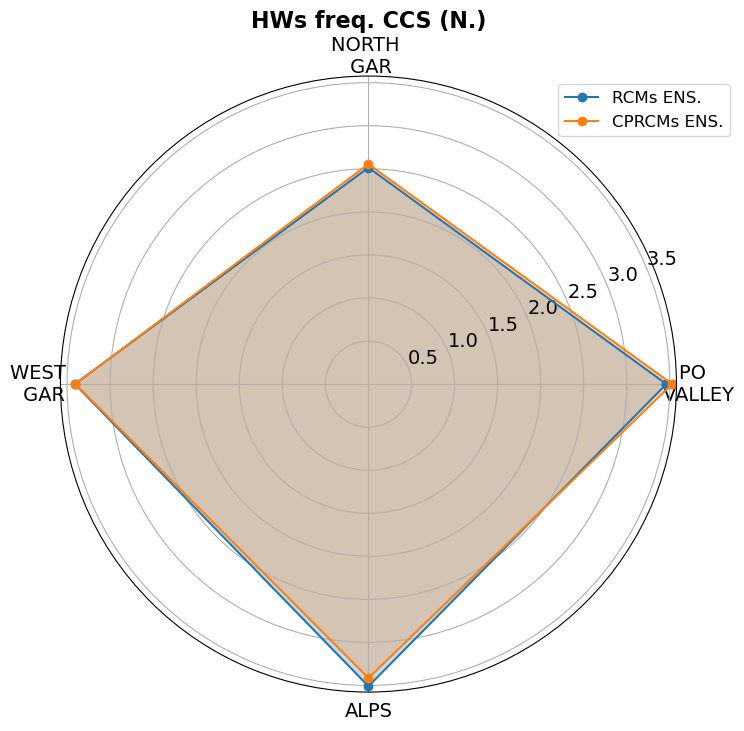

In [238]:
domains_name = [f'PO \n VALLEY',f'NORTH \n GAR','WEST \n GAR','ALPS']

labels = domains_name

rcm_values = [ccs_rcm_hw_all[0], ccs_rcm_hw_all[1],
              ccs_rcm_hw_all[2], ccs_rcm_hw_all[3]]
cprcm_values = [ccs_cprcm_hw_all[0], ccs_cprcm_hw_all[1],
                ccs_cprcm_hw_all[2], ccs_cprcm_hw_all[3]]

# Number of metrics
num_metrics = len(labels)

# Set the number of angles and the width of each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
rcm_values += rcm_values[:1]
cprcm_values += cprcm_values[:1]
angles += angles[:1]

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot RCM values
rcm_line = ax.plot(angles, rcm_values, label='RCMs ENS.', marker='o')
ax.fill(angles, rcm_values, alpha=0.25)

# Set axis limits for each metric
for i in range(num_metrics):
    ax.set_rmax(max(rcm_values[i], cprcm_values[i]))  # Set the maximum radius individually
    

# Plot CPRCM values
cprcm_line = ax.plot(angles, cprcm_values, label='CPRCMs ENS.', marker='o')
ax.fill(angles, cprcm_values, alpha=0.25)

# Add labels, legend, and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
# Increase the size of angle labels
ax.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize value as needed
ax.tick_params(axis='y', labelsize=14)  # Increase the size of radial axis labels

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1),fontsize=12)
if W_hw < 2 : 
    ax.set_title(f'{metrics_hw[W_hw]} (°C)',fontsize=16,fontweight='bold')
elif W_hw == 2 : 
    ax.set_title(f'{metrics_hw[W_hw]} (days)',fontsize=16,fontweight='bold')
elif W_hw == 3 : 
    ax.set_title(f'{metrics_hw[W_hw]}',fontsize=16,fontweight='bold')    
else : 
    ax.set_title(f'{metrics_hw[W_hw]} (N.)',fontsize=16,fontweight='bold')    

# Show the plot
plt.savefig(f'./figures/{metrics_hw_st[W_hw]}',dpi=300)



## Plot HFLS metrics radarplot

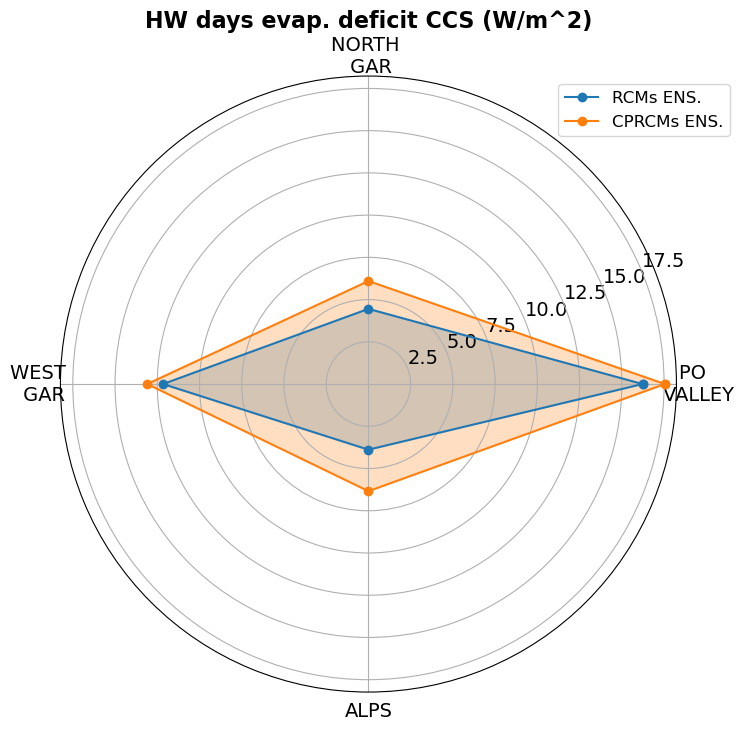

In [239]:
rcm_values = [ccs_rcm_hfls_all[0], ccs_rcm_hfls_all[1],
              ccs_rcm_hfls_all[2], ccs_rcm_hfls_all[3]]
cprcm_values = [ccs_cprcm_hfls_all[0], ccs_cprcm_hfls_all[1],
                ccs_cprcm_hfls_all[2], ccs_cprcm_hfls_all[3]]


# Number of metrics
num_metrics = len(labels)

# Set the number of angles and the width of each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
rcm_values += rcm_values[:1]
cprcm_values += cprcm_values[:1]
angles += angles[:1]

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot RCM values
rcm_line = ax.plot(angles, rcm_values, label='RCMs ENS.', marker='o')
ax.fill(angles, rcm_values, alpha=0.25)

# Add labels, legend, and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
# Increase the size of angle labels
ax.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize value as needed
ax.tick_params(axis='y', labelsize=14)  # Increase the size of radial axis labels

# Set axis limits for each metric
for i in range(num_metrics):
    ax.set_rmax(max(rcm_values[i], cprcm_values[i]))  # Set the maximum radius individually
    

# Plot CPRCM values
cprcm_line = ax.plot(angles, cprcm_values, label='CPRCMs ENS.', marker='o')
ax.fill(angles, cprcm_values, alpha=0.25)

# Add labels, legend, and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize value as needed

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1),fontsize=12)
ax.set_title(f'{metrics_hfls[W_hfls]} (W/m^2)',fontsize=16,fontweight='bold')

# Show the plot
plt.savefig(f'./figures/{metrics_hfls_st[W_hfls]}',dpi=300)

## Plot DSL metrics radarplot

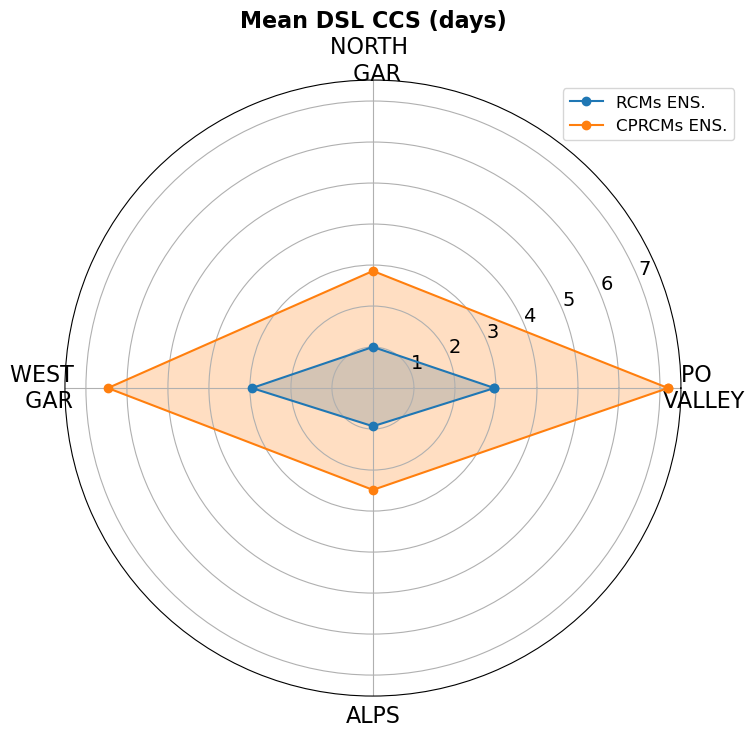

In [231]:

rcm_values = [ccs_rcm_dsl_all[0], ccs_rcm_dsl_all[1], 
              ccs_rcm_dsl_all[2], ccs_rcm_dsl_all[3]]
cprcm_values = [ccs_cprcm_dsl_all[0], ccs_cprcm_dsl_all[1],
                ccs_cprcm_dsl_all[2], ccs_cprcm_dsl_all[3]]

# Number of metrics
num_metrics = len(labels)

# Set the number of angles and the width of each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
rcm_values += rcm_values[:1]
cprcm_values += cprcm_values[:1]
angles += angles[:1]

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot RCM values
rcm_line = ax.plot(angles, rcm_values, label='RCMs ENS.', marker='o')
ax.fill(angles, rcm_values, alpha=0.25)

# Add labels, legend, and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
# Increase the size of angle labels
ax.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize value as needed
ax.tick_params(axis='y', labelsize=14)  # Increase the size of radial axis labels

# Set axis limits for each metric
for i in range(num_metrics):
    ax.set_rmax(max(rcm_values[i], cprcm_values[i]))  # Set the maximum radius individually
    
# Plot CPRCM values
cprcm_line = ax.plot(angles, cprcm_values, label='CPRCMs ENS.', marker='o')
ax.fill(angles, cprcm_values, alpha=0.25)

# Add labels, legend, and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_xticklabels(labels, fontsize=16)  # Adjust the fontsize value as needed

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1),fontsize=12)
ax.set_title(f'{metrics_dsl[W_dsl]} (days)',fontsize=16,fontweight='bold')

# Show the plot
plt.savefig(f'./figures/{metrics_dsl_st[W_dsl]}',dpi=300)